<a href="https://colab.research.google.com/github/Prezii/Project/blob/main/Waveform_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Colaboratory notebook

In [1]:
!pip install PyDrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id':"1eggTF4aMdUmNRACeHQIuibcckoixnvM6"})   # replace the id with id of file you want to access
downloaded.GetContentFile('tremor_events-2009-10-01T00_00_00-2017-07-31T23_59_59.csv')        # replace the file name with your file

In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv('tremor_events-2011-10-01T00_00_00-2015-02-28T23_59_59.csv')

In [6]:
data.head()

,lat,lon,depth,starttime,energy,duration
0,39.910,-122.200,37.5,2012-04-22 16:17:30,0.0,None
1,47.455,-123.085,36.5,2012-09-29 06:52:30,0.0,None
2,40.830,-122.850,54.0,2014-02-26 00:00:00,0.0,None
3,49.390,-125.820,20.0,2014-09-02 01:27:30,0.0,None
4,47.410,-122.960,33.0,2014-09-03 04:32:30,0.0,None


In [7]:
start_list= data.loc[:,"starttime"]
starttime_ls= start_list.to_numpy()
print(starttime_ls)

[' 2012-04-22 16:17:30' ' 2012-09-29 06:52:30' ' 2014-02-26 00:00:00' ...
 ' 2015-02-28 23:12:30' ' 2015-02-28 23:17:30' ' 2015-02-28 23:45:00']


##Obspy

In [8]:
#Install obspy
!pip install -U obspy
import obspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

In [10]:
 #Additional packages
import matplotlib.pyplot as plt

In this part we are goint to use IRIS metadata for NLLB and PGC stations

In [11]:
client = Client("IRIS")
network = "CN" #Canadian National Seismograph Network
station = "PGC"
location="*"
channel= "BHE"

In [12]:
starttime= UTCDateTime(2015, 7, 14, 22, 24, 57, 570000) 
endtime = starttime + 300 # 5 min = 300 sec

In [13]:
#starttime=starttime, endtime=endtime,
inv = client.get_stations(network=network, station=station, channel=channel,
                          level="response")

print(inv)

Inventory created at 2022-08-23T16:50:06.794000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?network=CN&station=P...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			CN
		Stations (1):
			CN.PGC (Sidney, BC, CA)
		Channels (6):
			CN.PGC..BHE (6x)


In [39]:
st = client.get_waveforms(network=network, station = station, location = location, channel = channel , starttime=starttime, endtime=endtime)
print(st) 

1 Trace(s) in Stream:
CN.PGC..BHE | 2015-07-14T22:24:57.575000Z - 2015-07-14T22:29:57.550000Z | 40.0 Hz, 12000 samples


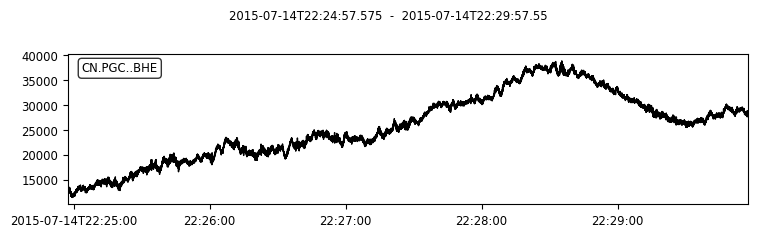

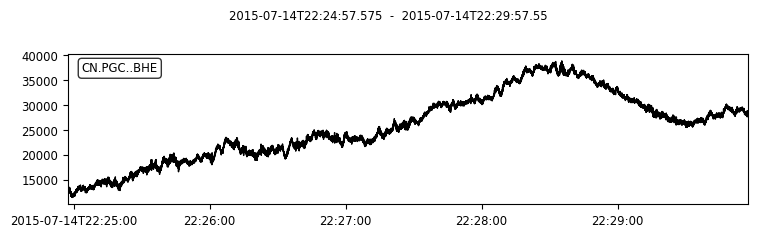

In [15]:
tr = st[0]
tr.plot()

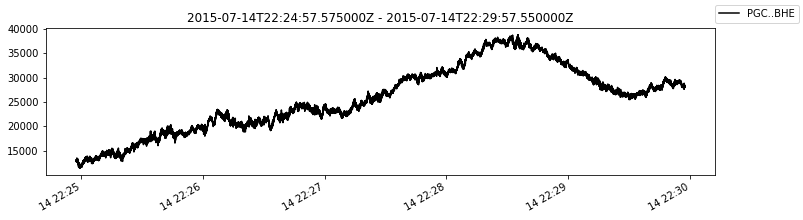

In [16]:
start_time = tr.stats.starttime
end_time = tr.stats.endtime

fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(tr.times("matplotlib"), tr.data, color="0", label = f"{tr.stats.station}..{tr.stats.channel}")
ax.xaxis_date()
fig.autofmt_xdate()

fig.legend()
plt.title(f"{start_time} - {end_time}")
plt.show()

https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_waveforms.html

In [23]:
starttime_ls[0]

' 2012-04-22 16:17:30'

In [24]:
def fun_starttime(ls):
  date=[]
  
  #Transformation to better adaptation of starttime in the IRIS database,
  #as result, it is obtenied an array of str 
  for i in range(len(ls)):
    if ls[i] !=" " and ls[i] !=":":
      date.append(ls[i])
    elif ls[i] == " " and i !=0:
      date.append("T")
    elif ls[i] ==":":
      break
  
  #Concatenation of arr of str
  date_st = ""
  for i in range(len(date)):
    date_st += date[i]

  return date_st

In [28]:
new_startime_ls = []
for i in range(len(starttime_ls)):
  new_startime_ls.append(fun_starttime(starttime_ls[i]))

In [34]:
print(len(starttime_ls),len(new_startime_ls))
new_startime_ls_np = np.array(new_startime_ls)

139322 139322


In [35]:
new_startime_ls_np

array(['2012-04-22T16', '2012-09-29T06', '2014-02-26T00', ...,
       '2015-02-28T23', '2015-02-28T23', '2015-02-28T23'], dtype='<U13')

In [20]:
"""
def exist_wavedata(station, ls):
  #Constants
  network = "CN" #Canadian National Seismograph Network
  location="*" 
  channel="BHE"
  
  #Variables
  for i in range(len(ls)):
    starttime = fun_starttime(ls)
    endtime = starttime + 300 # 5 min = 300 sec
    for i in range(starttime_ls):
      try:
        st = client.get_waveforms(network=network, station = station, location = location, channel = channel , starttime=starttime, endtime=endtime,attach_response=True)
        break
      except:
        print("There is no data here in this date")

  return 0
"""

In [71]:
st_arr = []

for i in range(4):
  
  starttime= UTCDateTime(new_startime_ls_np[i])
  endtime = starttime + 300 # 5 min = 300 sec

  st = client.get_waveforms(network=network, station = station, location = location, channel = channel , starttime=starttime, endtime=endtime,attach_response=True)
  
  st_arr.append(st)


In [70]:
len(st_arr)

1

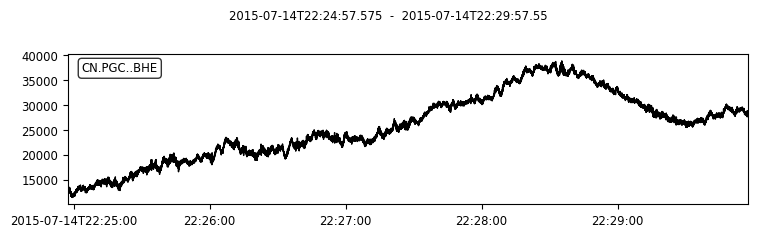

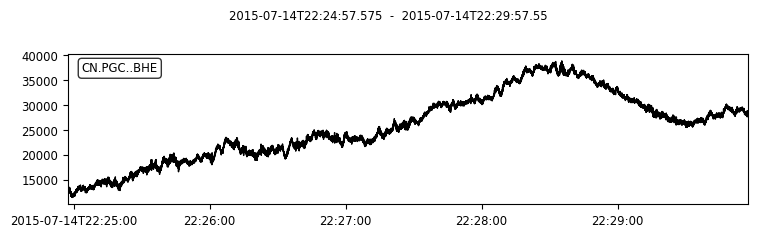

In [44]:
st.plot()